In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
files = ['balanced_data/BK7610_balanced_250hz.parquet', 
         'balanced_data/BU4707_balanced_250hz.parquet', 
         'balanced_data/CC6740_balanced_250hz.parquet',
         'balanced_data/DC6359_balanced_250hz.parquet',
         'balanced_data/DK3500_balanced_250hz.parquet',
         'balanced_data/HV0618_balanced_250hz.parquet',
         'balanced_data/JB3156_balanced_250hz.parquet',
         'balanced_data/JR8022_balanced_250hz.parquet',
         'balanced_data/MC7070_balanced_250hz.parquet',
         'balanced_data/MJ8002_balanced_250hz.parquet',
         'balanced_data/PC6771_balanced_250hz.parquet',
         'balanced_data/SA0297_balanced_250hz.parquet',
         'balanced_data/SF3079_balanced_250hz.parquet'
         ]

In [4]:
feat_files = ['features/BK7610_features.parquet', 
         'features/BU4707_features.parquet', 
         'features/CC6740_features.parquet',
         'features/DC6359_features.parquet',
         'features/DK3500_features.parquet',
         'features/HV0618_features.parquet',
         'features/JB3156_features.parquet',
         'features/JR8022_features.parquet',
         'features/MC7070_features.parquet',
         'features/MJ8002_features.parquet',
         'features/PC6771_features.parquet',
         'features/SA0297_features.parquet',
         'features/SF3079_features.parquet'
         ]

In [5]:
pids = ['BK7610', 
         'BU4707', 
         'CC6740',
         'DC6359',
         'DK3500',
         'HV0618',
         'JB3156',
         'JR8022',
         'MC7070',
         'MJ8002',
         'PC6771',
         'SA0297',
         'SF3079'
         ]

In [8]:
def thirteen_fold_cross_validation(parquet_files):
    accuracies = []
    
    for i, test_file in enumerate(parquet_files):
        test_data = pd.read_parquet(test_file)
        test_labels = test_data['TAC_class']
        test_data = test_data.drop(columns=['time', 'pid','TAC_class'])
        
        train_files = parquet_files[:i] + parquet_files[i+1:]
        train_data = pd.concat([pd.read_parquet(file) for file in train_files])
        train_labels = train_data['TAC_class']
        train_data = train_data.drop(columns=['time', 'pid','TAC_class'])
        # ntrees: 136
        # learn_rate: 0.3
        # max_depth: 5
        # min_child_weight: 3.0
        # subsample: 0.8
        rf_classifier = GradientBoostingClassifier(learning_rate= 0.3, n_estimators=100, max_depth=5, subsample= 0.8,  random_state=42)
        # rf_classifier = GradientBoostingClassifier(learning_rate= 1, n_estimators=100, max_leaf_nodes=5,  random_state=42)
        rf_classifier.fit(train_data, train_labels)
        y_pred = rf_classifier.predict(test_data)
        accuracy = rf_classifier.score(test_data, test_labels)
        accuracies.append(accuracy)
        print(f"Participant {pids[i]}, Fold {len(accuracies)} Accuracy: {accuracy}")
        conf_matrix = confusion_matrix(test_labels, y_pred)
        conf_matrix_norm = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

        # Plot confusion matrix with percentages
        data = pd.read_parquet(test_file)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix_norm, annot=True, fmt=".2f", cmap="Blues", cbar=False)
        plt.title(f"Confusion Matrix {pids[i]} (Percentages)")
        plt.xlabel("Predicted Class")
        plt.ylabel("Actual Class")
        plt.show()
    

Participant 1, Fold 1 Accuracy: 0.6328986960882648


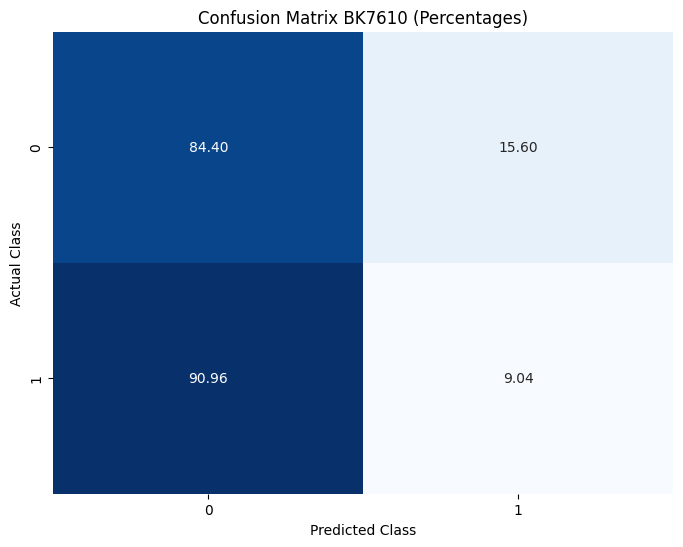

Participant 2, Fold 2 Accuracy: 0.8470127326150833


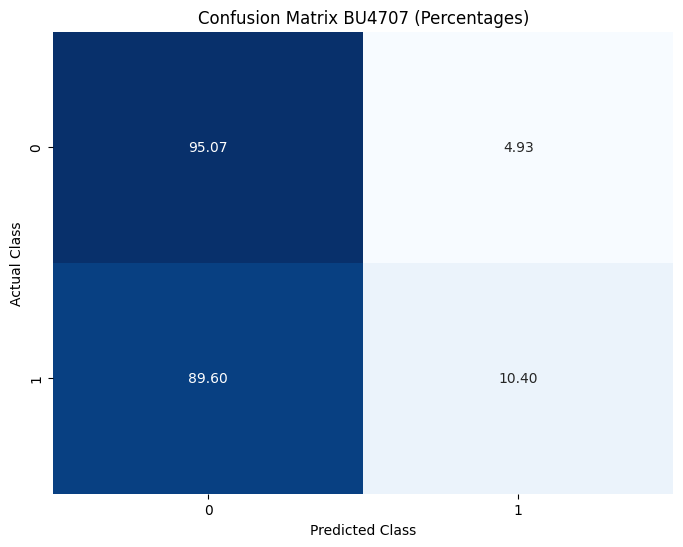

Participant 3, Fold 3 Accuracy: 0.5404319437468609


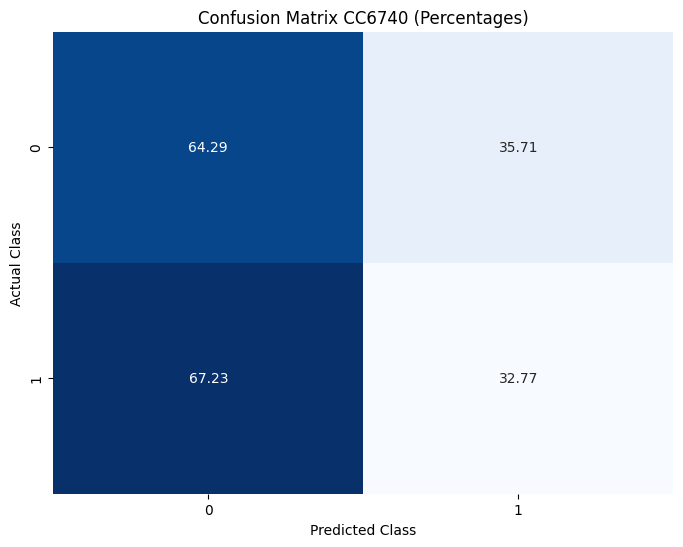

Participant 4, Fold 4 Accuracy: 0.5952117863720073


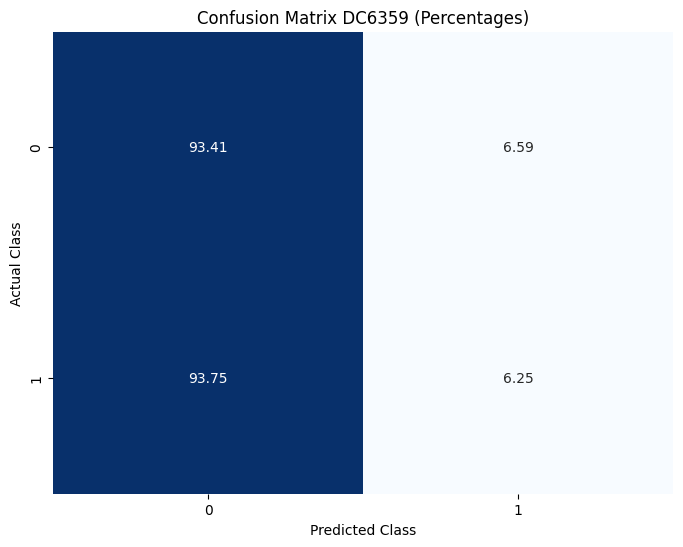

Participant 5, Fold 5 Accuracy: 0.14687028657616893


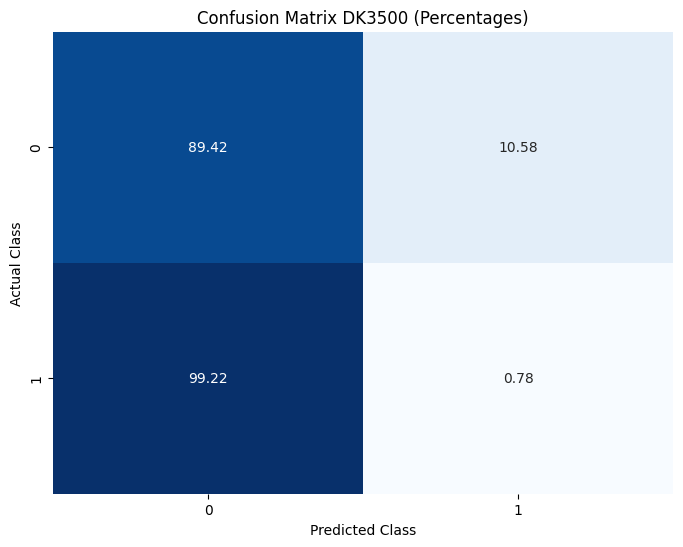

Participant 6, Fold 6 Accuracy: 0.8415158371040724


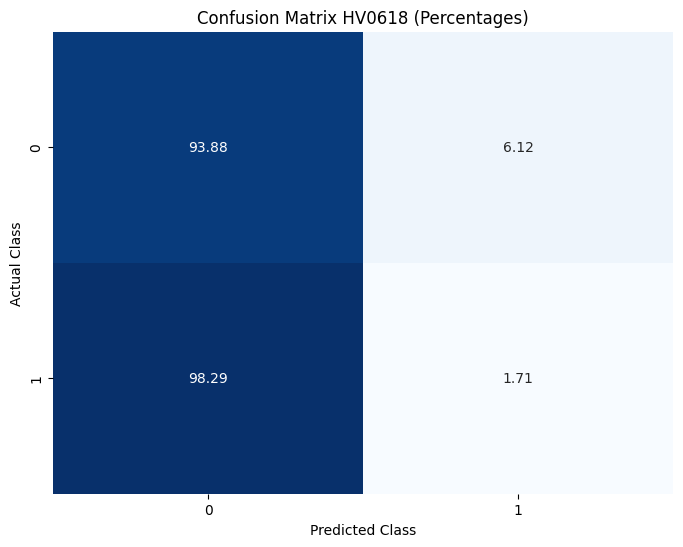

Participant 7, Fold 7 Accuracy: 0.5081144880495722


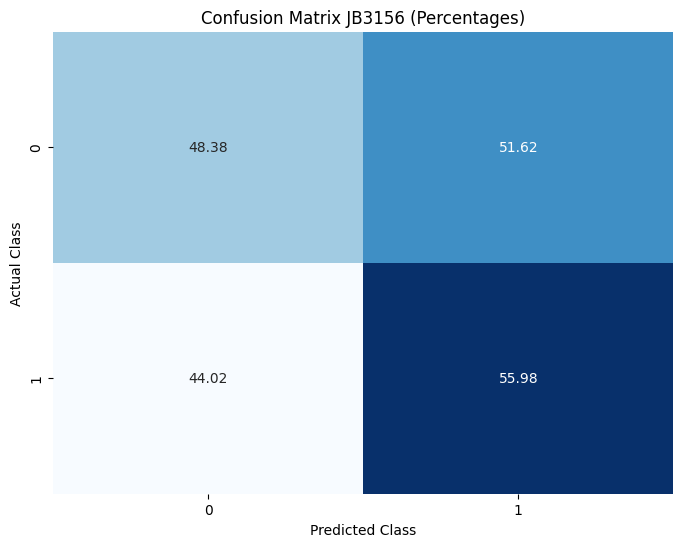

Participant 8, Fold 8 Accuracy: 0.32007975604034716


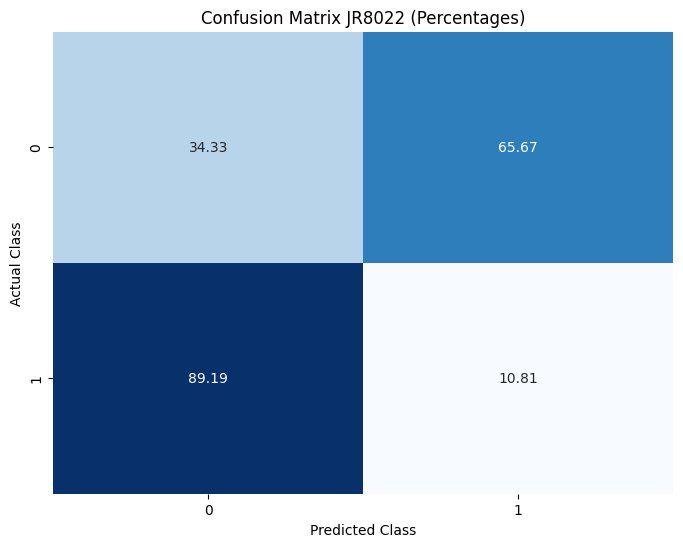

Participant 9, Fold 9 Accuracy: 0.3884418434528164


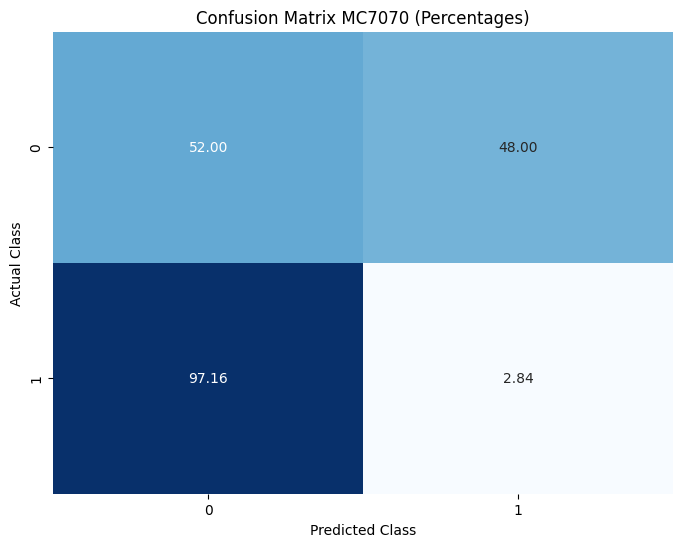

Participant 10, Fold 10 Accuracy: 0.5480854290408189


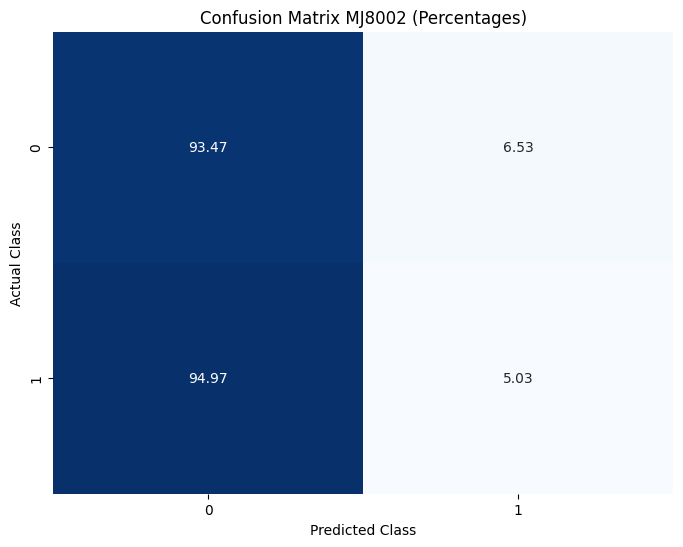

Participant 11, Fold 11 Accuracy: 0.7245441342585122


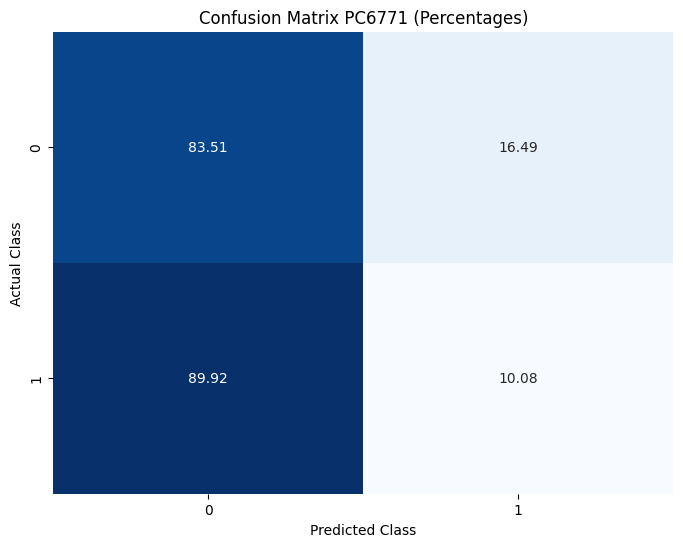

Participant 12, Fold 12 Accuracy: 0.7587274290627687


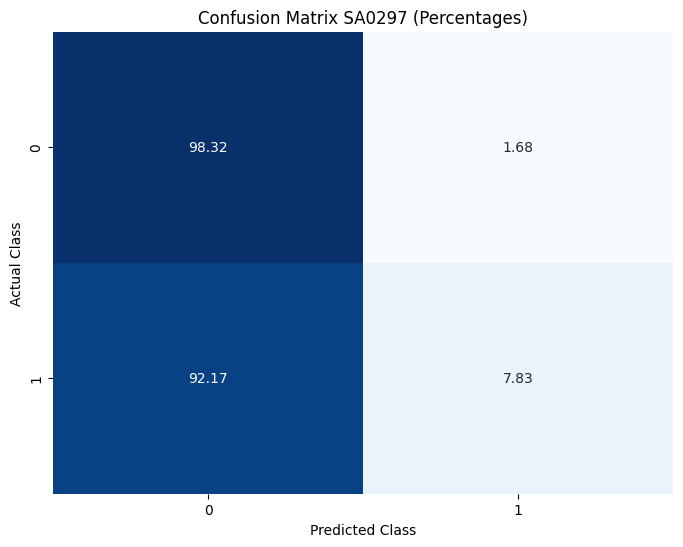

Participant 13, Fold 13 Accuracy: 0.8329288418600136


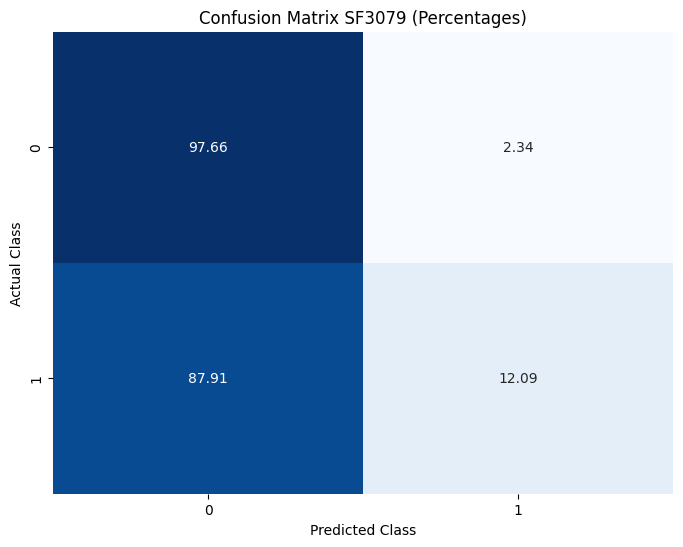

In [9]:
thirteen_fold_cross_validation(feat_files)